In [68]:
# import pandas
import pandas as pd

In [69]:
# Load dataset 'Bitcoin Market Sentiment Dataset '
bitcoin_sentiment_df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ds_siddharthj/csv_files/fear_greed_index.csv')

In [70]:
# Load dataset 'Historical Trader Data from Hyperliquid'
trader_data_df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ds_siddharthj/csv_files/historical_data.csv')

In [71]:
# Print Summary of the data

bitcoin_sentiment_df.info()

trader_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-nu

In [72]:
# Print first five rows of the dataset

bitcoin_sentiment_df.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [73]:
trader_data_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [74]:
# Convert 'date' in sentiment_df to datetime
bitcoin_sentiment_df['date'] = pd.to_datetime(bitcoin_sentiment_df['date'])

# Convert 'Timestamp IST' in trader_data_df to datetime
trader_data_df['Timestamp IST'] = pd.to_datetime(trader_data_df['Timestamp IST'], format='%d-%m-%Y %H:%M')

# Create a 'date' column so it can be used for merging later
# This extracts just the date part (year-month-day) from the timestamp
trader_data_df['date'] = trader_data_df['Timestamp IST'].dt.date
trader_data_df['date'] = pd.to_datetime(trader_data_df['date'])

In [75]:
# updated data information
bitcoin_sentiment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   timestamp       2644 non-null   int64         
 1   value           2644 non-null   int64         
 2   classification  2644 non-null   object        
 3   date            2644 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 82.8+ KB


In [76]:
trader_data_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02


In [77]:
# No null values Present seen from info() method (non-null)
# Merge the trader data with the sentiment data
merged_df = pd.merge(trader_data_df, bitcoin_sentiment_df, on='date', how='left')

# Print the first five rows of the merged dataframe
print(merged_df.head())

                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side       Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY 2024-12-02 22:50:00        0.000000       Buy   
1        16.00    127.68  BUY 2024-12-02 22:50:00      986.524596       Buy   
2       144.09   1150.63  BUY 2024-12-02 22:50:00     1002.518996       Buy   
3       142.98   1142.04  BUY 2024-12-02 22:50:00     1146.558564       Buy   
4         8.73     69.75  BUY 2024-12-02 22:50:00     1289.488521       Buy   

   Closed PnL                                   Transaction Hash     Order ID  \
0         0

In [78]:
# Group by sentiment classification and calculate key metrics
sentiment_analysis = merged_df.groupby('classification').agg(
    total_pnl=('Closed PnL', 'sum'),
    average_pnl=('Closed PnL', 'mean'),
    total_volume_usd=('Size USD', 'sum'),
    average_trade_size_usd=('Size USD', 'mean'),
    trade_count=('Account', 'count')
).sort_values(by='average_pnl', ascending=False) # Sort by most profitable

# Print the results
print(sentiment_analysis)

                   total_pnl  average_pnl  total_volume_usd  \
classification                                                
Extreme Greed   2.715171e+06    67.892861      1.244652e+08   
Fear            3.357155e+06    54.290400      4.833248e+08   
Greed           2.150129e+06    42.743559      2.885825e+08   
Extreme Fear    7.391102e+05    34.537862      1.144843e+08   
Neutral         1.292921e+06    34.307718      1.802421e+08   

                average_trade_size_usd  trade_count  
classification                                       
Extreme Greed              3112.251565        39992  
Fear                       7816.109931        61837  
Greed                      5736.884375        50303  
Extreme Fear               5349.731843        21400  
Neutral                    4782.732661        37686  


In [79]:
# Find the top 10 traders by total trading volume
top_10_traders = merged_df.groupby('Account')['Size USD'].sum().nlargest(10).index

# Filter the dataframe to include only these top traders
top_traders_df = merged_df[merged_df['Account'].isin(top_10_traders)]

print("Top 10 Trader Accounts:")
print(top_10_traders)

Top 10 Trader Accounts:
Index(['0x513b8629fe877bb581bf244e326a047b249c4ff1',
       '0x4f93fead39b70a1824f981a54d4e55b278e9f760',
       '0xb899e522b5715391ae1d4f137653e7906c5e2115',
       '0xbee1707d6b44d4d52bfe19e41f8a828645437aab',
       '0xbaaaf6571ab7d571043ff1e313a9609a10637864',
       '0x083384f897ee0f19899168e3b1bec365f52a9012',
       '0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23',
       '0x4acb90e786d897ecffb614dc822eb231b4ffb9f4',
       '0x271b280974205ca63b716753467d5a371de622ab',
       '0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4'],
      dtype='object', name='Account')


In [80]:
# Group top traders by account and sentiment to analyze their PnL
top_trader_analysis = top_traders_df.groupby(['Account', 'classification']).agg(
    average_pnl=('Closed PnL', 'mean'),
    total_volume_usd=('Size USD', 'sum')
).reset_index()

print("\nTop Trader Performance by Sentiment:")
print(top_trader_analysis)


Top Trader Performance by Sentiment:
                                       Account classification  average_pnl  \
0   0x083384f897ee0f19899168e3b1bec365f52a9012   Extreme Fear  1247.692214   
1   0x083384f897ee0f19899168e3b1bec365f52a9012  Extreme Greed   -42.626810   
2   0x083384f897ee0f19899168e3b1bec365f52a9012           Fear   626.194346   
3   0x083384f897ee0f19899168e3b1bec365f52a9012          Greed   482.089321   
4   0x083384f897ee0f19899168e3b1bec365f52a9012        Neutral   298.456334   
5   0x271b280974205ca63b716753467d5a371de622ab   Extreme Fear    20.962214   
6   0x271b280974205ca63b716753467d5a371de622ab  Extreme Greed   358.632043   
7   0x271b280974205ca63b716753467d5a371de622ab           Fear    16.125220   
8   0x271b280974205ca63b716753467d5a371de622ab          Greed  -185.221864   
9   0x271b280974205ca63b716753467d5a371de622ab        Neutral   -31.783540   
10  0x4acb90e786d897ecffb614dc822eb231b4ffb9f4   Extreme Fear   169.063285   
11  0x4acb90e786d897ecffb6

/tmp/ipython-input-3372681999.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_analysis.index, y=sentiment_analysis['average_pnl'], palette='viridis')


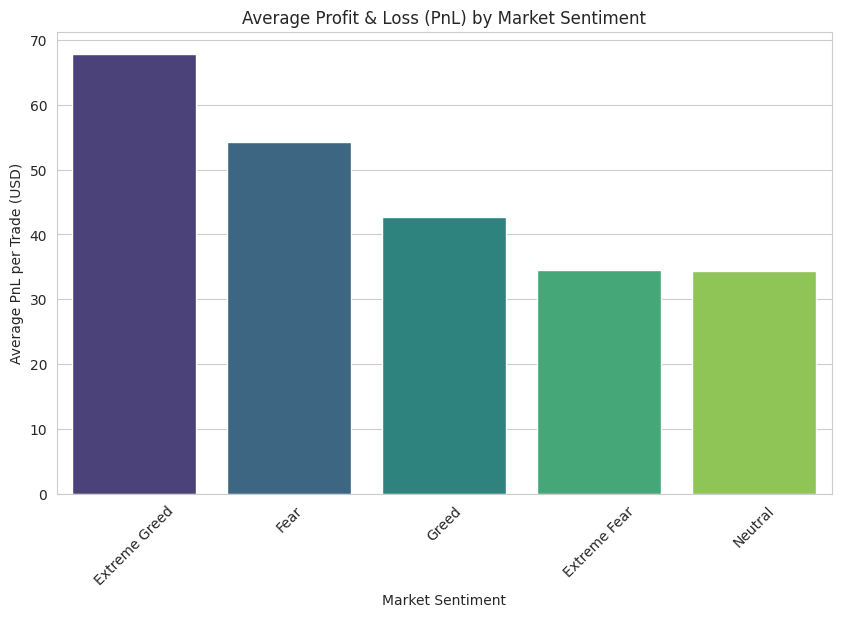

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the plot style
sns.set_style("whitegrid")

# Create a bar plot for Average PnL by Sentiment
plt.figure(figsize=(10, 6))
sns.barplot(x=sentiment_analysis.index, y=sentiment_analysis['average_pnl'], palette='viridis')
plt.title('Average Profit & Loss (PnL) by Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Average PnL per Trade (USD)')
plt.xticks(rotation=45)
plt.savefig('/content/drive/MyDrive/Colab Notebooks/ds_siddharthj/outputs/output1.png', dpi=300, bbox_inches='tight')
plt.show()

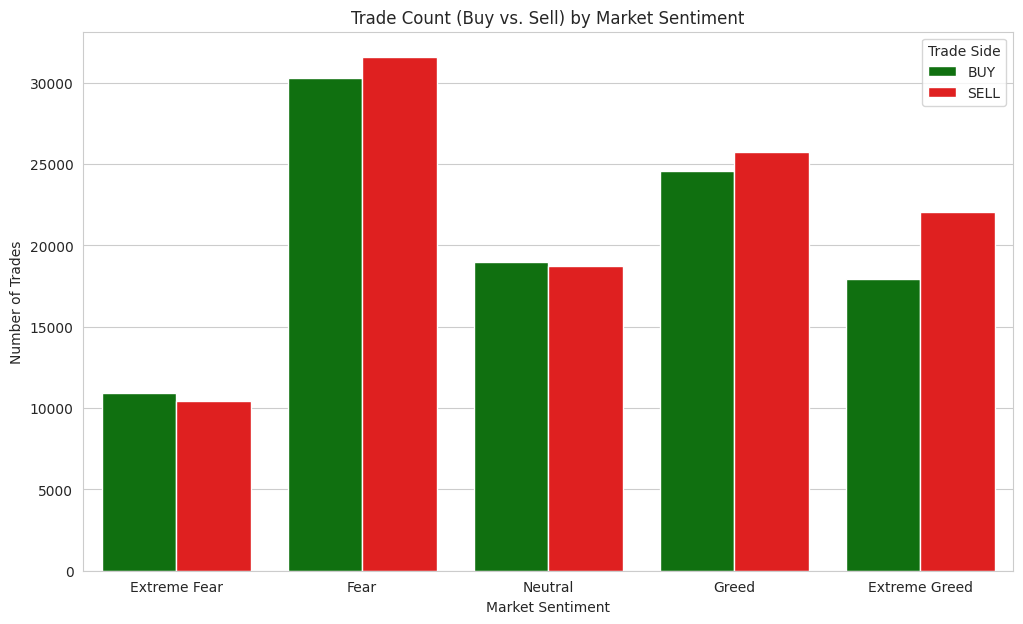

In [82]:
 # Create a count plot to see the number of Buy vs. Sell trades
plt.figure(figsize=(12, 7))
sns.countplot(
    data=merged_df,
    x='classification',
    hue='Side', # Differentiate by 'BUY' or 'SELL'
    palette={'BUY': 'green', 'SELL': 'red'},
    order=['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed'] # Logical order
)
plt.title('Trade Count (Buy vs. Sell) by Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Number of Trades')
plt.legend(title='Trade Side')
plt.savefig('/content/drive/MyDrive/Colab Notebooks/ds_siddharthj/outputs/output3.png', dpi=300, bbox_inches='tight')
plt.show()

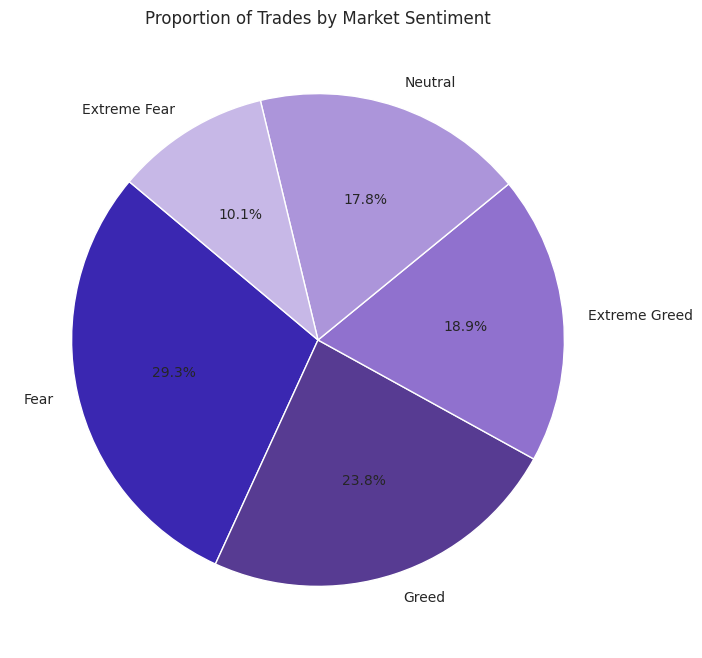

In [83]:
import matplotlib.pyplot as plt

# Count the number of trades for each sentiment classification
sentiment_counts = merged_df['classification'].value_counts()

# Define a custom list of colors for the pie chart
custom_colors = ['#3a27b1', '#573b92', '#9071ce', '#ac95da', '#c7b8e7']

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    sentiment_counts,
    labels=sentiment_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=custom_colors  # Use your custom color list here
)
plt.title('Proportion of Trades by Market Sentiment')
plt.ylabel('')
plt.savefig('/content/drive/MyDrive/Colab Notebooks/ds_siddharthj/outputs/output3.png', dpi=300, bbox_inches='tight')
plt.show()

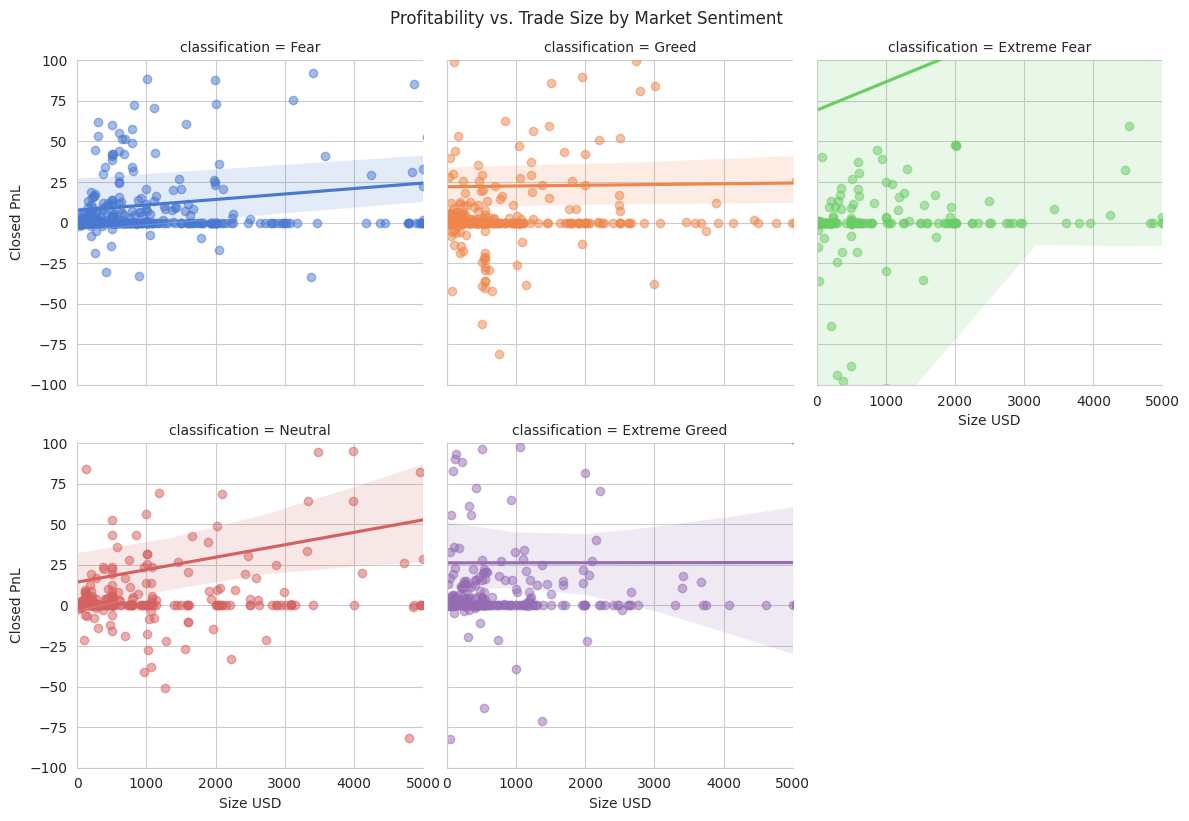

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

# We are using a sample of the data for plotting to avoid overplotting and long render times.
# The frac=0.01 means we're using 1% of the data.
sampled_df = merged_df.sample(frac=0.01, random_state=42)

sns.lmplot(
    data=sampled_df,
    x='Size USD',
    y='Closed PnL',
    col='classification',  # Creates a separate plot for each sentiment
    col_wrap=3,            # Wraps the plots into 3 columns
    hue='classification',  # Colors the points by sentiment
    palette='muted',
    scatter_kws={'alpha':0.5}, # Makes points semi-transparent
    height=4
)

# Set axis limits to zoom in on the majority of trades, excluding extreme outliers.
plt.xlim(0, 5000)
plt.ylim(-100, 100)
plt.suptitle('Profitability vs. Trade Size by Market Sentiment', y=1.02)
plt.savefig('/content/drive/MyDrive/Colab Notebooks/ds_siddharthj/outputs/output4.png', dpi=300, bbox_inches='tight')
plt.show()